# Homework 4: Data Visualization
- **Name**:  Poulomee Roy
- **UB Username**: poulomee
- **UB Person Number**:  50541095

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [ ]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

In [2]:
# raed scatter data.csv
df = pd.read_csv('scatter_data.csv')
df.head()

,% x,y
0,95.954341,328.375777
1,60.162754,259.053445
2,52.754898,207.792989
3,88.034798,333.209632
4,80.271275,290.042475


In [3]:
df.shape

(100, 2)

In [4]:
# remove the percent sign (%) if appear in any row or column name, (which denotes a comment)
df.columns = df.columns.str.replace('%', '')
df.columns = df.columns.str.replace(' ', '')
df.head()


,x,y
0,95.954341,328.375777
1,60.162754,259.053445
2,52.754898,207.792989
3,88.034798,333.209632
4,80.271275,290.042475


In [5]:
df.columns

Index(['x', 'y'], dtype='object')

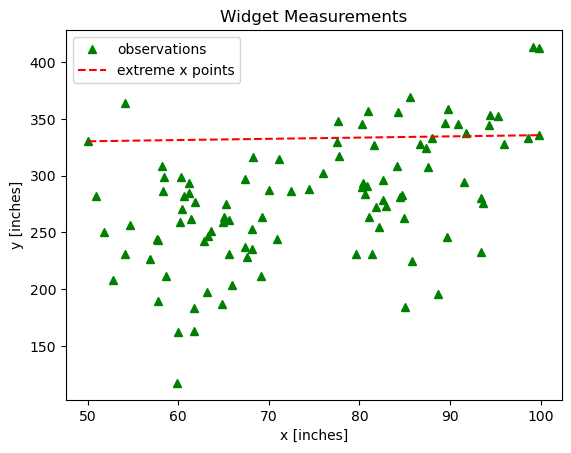

In [6]:
# plot the data points as green triangles
plt.plot(df['x'], df['y'], 'g^')

# plot a line from the minimum x-value to the maximum x-value. The line should be dashed and colored red
plt.plot([df['x'].min(), df['x'].max()], [df.loc[df['x'].idxmin(), 'y'], df.loc[df['x'].idxmax(), 'y']], 'r--')

# include a title for your plot
plt.title('Widget Measurements')

# label the x- and y-axes
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')

# include a legend for your plot
plt.legend(['observations', 'extreme x points'])


### Problem 2 - Histogram

In [7]:
# read data student grades.csv
# df = pd.read_csv('student_grades.csv')
df = pd.read_csv('student_grades.csv', comment='%',
                   names=['student_id', 'average_score'])
df.head()

,student_id,average_score
0,0,81.563259
1,1,67.426527
2,2,86.415197
3,3,80.387361
4,4,76.669249


In [8]:
df.shape

(75, 2)

In [9]:
# define bins and labels
bins = [0, 60, 70, 80, 90, 100]
labels = ['F', 'D', 'C', 'B', 'A']

In [11]:
df['Grade'] = pd.cut(df['average_score'], bins=bins, labels=labels, right=False)

In [12]:
df.head()

,student_id,average_score,Grade
0,0,81.563259,B
1,1,67.426527,D
2,2,86.415197,B
3,3,80.387361,B
4,4,76.669249,C


In [65]:
df.shape

(75, 3)

In [13]:
# check the rows if average_score > 100
df[df['average_score'] > 100]

,student_id,average_score,Grade
5,5,100.106000,NaN
6,6,107.756273,NaN
8,8,101.762623,NaN
74,74,100.021837,NaN


In [14]:
# check the rows if average_score < 0
df[df['average_score'] < 0]

,student_id,average_score,Grade


In [15]:
df['Grade'].value_counts(sort=False)

F     3
D    14
C    21
B    28
A     5
Name: Grade, dtype: int64

In [16]:
counts = df['Grade'].value_counts(sort=False)

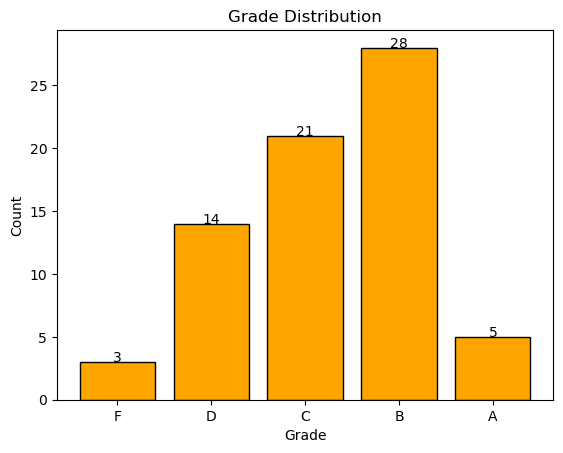

In [17]:
# histogram without sorting
bars = plt.bar(counts.index, counts.values, color='orange', edgecolor='black')

# add counts above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2),  ha='center')

# # customize the x-axis labels
# plt.xticks(range(len(labels)), labels)

plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')

plt.show()

### Problem 3 - Barplot and Boxplot in the Same Figure

In [18]:
import seaborn as sns

# Reading the data from the CSV file, ignoring rows that begin with '%'
df = pd.read_csv('solution_data.csv')
df.columns = df.columns.str.replace('%', '')
df.columns = df.columns.str.replace(' ', '')
df.head()

,Problem,SolnMethod,Value
0,0,genetic algorithm,112.749860
1,0,simulated annealing,75.220917
2,0,tabu search,111.574225
3,0,optimal,166.170172
4,1,genetic algorithm,31.819762


In [19]:
df.columns

Index(['Problem', 'SolnMethod', 'Value'], dtype='object')

In [20]:
# Removing leading and trailing '|' from SolnMethod
df['SolnMethod'] = df['SolnMethod'].str.strip('|')
df.head()

,Problem,SolnMethod,Value
0,0,genetic algorithm,112.749860
1,0,simulated annealing,75.220917
2,0,tabu search,111.574225
3,0,optimal,166.170172
4,1,genetic algorithm,31.819762


In [27]:
# df['OptimalOFV'] = None

In [9]:
# # group by problem and get the value of SolnMethod with 'optimal' solution, then create a new column 'Optimal OFV' with
# df['OptimalOFV'] = df.groupby('Problem')['Value'].transform('max')
# df.head()

In [10]:
# # Group by 'Problem' and iterate through each group
# for name, group in df.groupby('Problem'):
#     # find the 'Value' corresponding to 'optimal' in 'SolnMethod'
#     optimal_value = group.loc[group['SolnMethod'] == 'optimal', 'Value'].values[0]
#     # update the 'OptimalOFV' column for each row in the group
#     df.loc[df['Problem'] == name, 'OptimalOFV'] = optimal_value

In [21]:
# get the problem wise optimal value
df['OptimalOFV'] = df.groupby('Problem')['Value'].transform(lambda x: x.loc[df['SolnMethod'] == 'optimal'].iloc[0])

In [29]:
df.head()

,Problem,SolnMethod,Value,OptimalOFV
0,0,genetic algorithm,112.749860,166.170172
1,0,simulated annealing,75.220917,166.170172
2,0,tabu search,111.574225,166.170172
3,0,optimal,166.170172,166.170172
4,1,genetic algorithm,31.819762,48.634470


In [23]:
# calculate the optimality gap for each heuristic
df['optimality_gap'] = (df['OptimalOFV'] - df['Value']) / df['OptimalOFV'] * 100

In [31]:
# Filter data for specified heuristics
filtered_df = df[df['SolnMethod'].isin(['genetic algorithm', 'simulated annealing', 'tabu search'])]
filtered_df.head(3)

,Problem,SolnMethod,Value,OptimalOFV,optimality_gap
0,0,genetic algorithm,112.749860,166.170172,32.147955
1,0,simulated annealing,75.220917,166.170172,54.732600
2,0,tabu search,111.574225,166.170172,32.855444


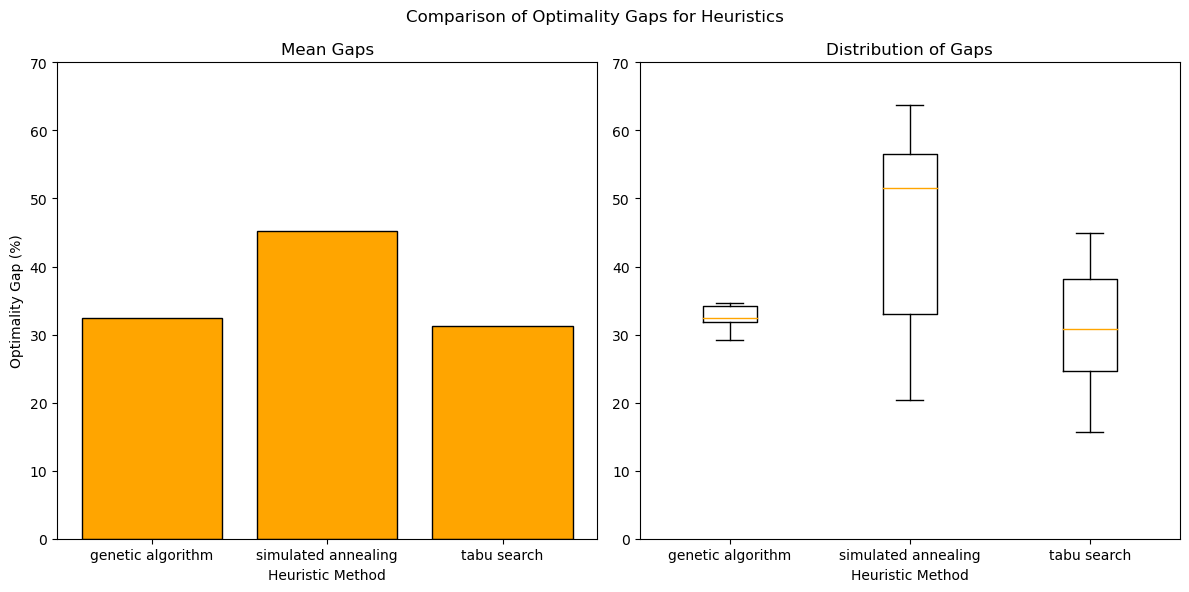

In [26]:
# Create the figure and the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for the first subplot (bar plot)
axs[0].bar(filtered_df['SolnMethod'].unique(), filtered_df.groupby('SolnMethod')['optimality_gap'].mean(), color='orange', edgecolor='black')
axs[0].set_title('Mean Gaps')
axs[0].set_xlabel('Heuristic Method')
axs[0].set_ylabel('Optimality Gap (%)')
axs[0].set_yticks(range(0, int(filtered_df['optimality_gap'].max()) + 10, 10))

# Plot for the second subplot (box plot)
axs[1].boxplot([filtered_df[filtered_df['SolnMethod'] == method]['optimality_gap'] for method in filtered_df['SolnMethod'].unique()], 
               labels=filtered_df['SolnMethod'].unique(), medianprops=dict(color='orange'))
axs[1].set_title('Distribution of Gaps')
axs[1].set_xlabel('Heuristic Method')
axs[1].set_yticks(range(0, int(filtered_df['optimality_gap'].max()) + 10, 10))

# Set the same y-axis scale for both subplots
ylim = axs[1].get_ylim()
axs[0].set_ylim(ylim)

# Adjust layout
plt.suptitle('Comparison of Optimality Gaps for Heuristics')
plt.tight_layout()
plt.show()


--- 
## Part 2 - Explore New Plot Types

[In this space, provide a concise explanation of your plot.  The reader should be able to read this to learn what kind of plot you're about to create, what type of data you're going to plot, and why you believe it is wise to use this type of plot for this type of data.  (replace these instructions with your actual content, and remove the brackets)]

- **URL of Example Code**:  https://seaborn.pydata.org/generated/seaborn.stripplot.html
- **URL of Sample Data**:   https://www.kaggle.com/code/sanjanabasu/tips-dataset/input

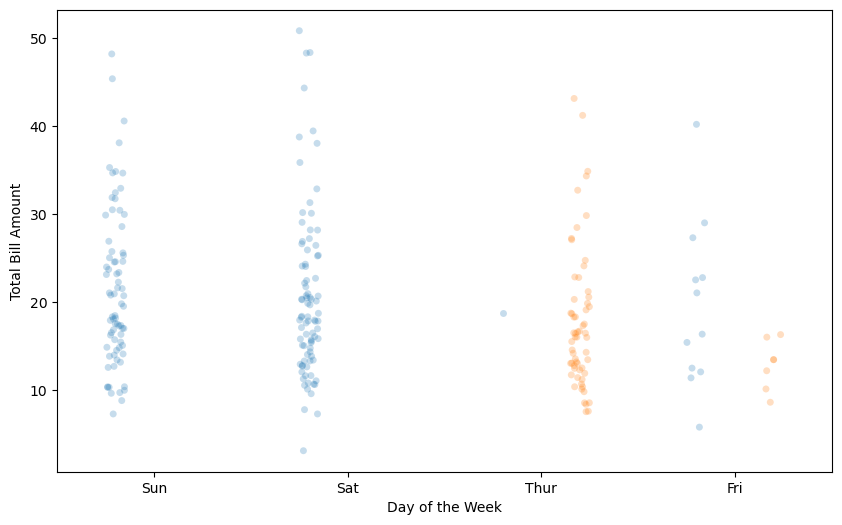

In [9]:
# Use "Code" cells to create your plots 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the MovieLens dataset (adjust the file path as needed)

df2= pd.read_csv("tips.csv")
# data = sns.load_dataset("tips")  # Replace with your actual data

# Create a stripplot
plt.figure(figsize=(10, 6))
stripplot = sns.stripplot(
    data=df2, x="day", y="total_bill", hue="time",
    dodge=True, alpha=0.25, zorder=1, legend=False
)

# Add labels to the plot
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill Amount")

# Show the plot
plt.show()



#Step 1: Import the necessary libraries
#The code starts by importing two libraries: seaborn and matplotlib.pyplot. Seaborn is a Python library for generating statistical graphics, and matplotlib.pyplot is a Python plotting library.

#Step 2: Load the dataset
#The code then loads the MovieLens tips dataset into a Pandas DataFrame called df2. The file path to the dataset is specified as "tips.csv". If you are using a different dataset, you will need to change the file path accordingly.

#Step 3: Create a stripplot
#The code creates a stripplot using the sns.stripplot() function. A stripplot is a type of plot that shows the distribution of data along a single dimension. In this case, the stripplot shows the distribution of total bill amounts across different days of the week.
#The following parameters are passed to the sns.stripplot() function:
#data=df2: This specifies the DataFrame that contains the data to be plotted.
#x="day": This specifies the name of the column in the DataFrame that contains the x-axis data. In this case, the x-axis data is the day of the week.
#y="total_bill": This specifies the name of the column in the DataFrame that contains the y-axis data. In this case, the y-axis data is the total bill amount.
#hue="time": This specifies the name of the column in the DataFrame that contains the hue data. In this case, the hue data is the time of day (lunch or dinner).
#dodge=True: This specifies that the dots should be dodged, so that they do not overlap.
#alpha=0.25: This specifies the opacity of the dots.
#zorder=1: This specifies the z-order of the dots.
#legend=False: This specifies that the legend should not be displayed.
#Step 4: Add labels to the plot
#The code adds labels to the x-axis and y-axis of the plot using the plt.xlabel() and plt.ylabel() functions, respectively.
#Step 5: Show the plot
#The code displays the plot using the plt.show() function.

In [ ]:
# It's OK to break up your code into multiple cells.

In [3]:
# Explanation of code

# Explanation of the plot:
#The strip plot on tips data shows the distribution of total bill amounts across different days of the week. Each dot represents an individual tip, and the position of the dot on the x-axis corresponds to the day of the week. The jitter, or random offset, of the dots ensures that they do not overlap, even when there are multiple tips for the same day of the week.

From the strip plot, we can observe that there are generally more tips on Fridays and Saturdays than on other days of the week. This is likely because people tend to dine out more frequently on the weekends. We can also see that there is a wider range of tip amounts on Fridays and Saturdays, suggesting that people are more likely to tip generously on these days.Only on Thursdays there is tips given for lunch as well, the orange denotes lunch tips and blue denotes dinner tips. For each day there are two strips where each point is denoting total bill and the density is denoting the dodging the line


Overall, the strip plot provides a quick and easy way to visualize the distribution of tip amounts across different days of the week. It is a useful tool for identifying patterns and trends in the data.

<Figure size 800x800 with 0 Axes>

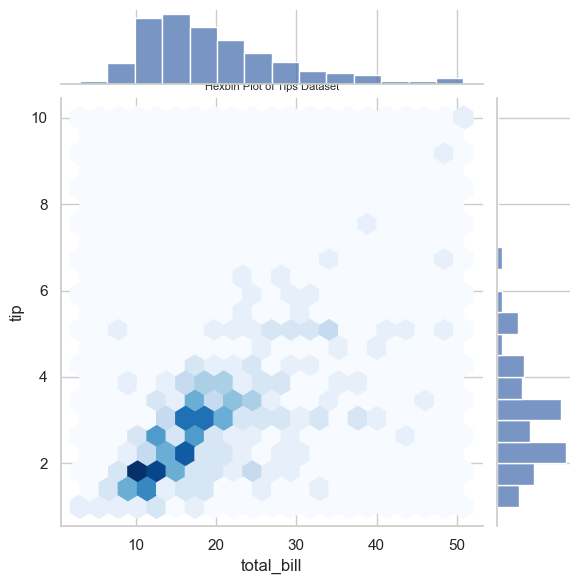

In [13]:
#Alternative Hexbin plot on the same dataset
# Link: https://seaborn.pydata.org/examples/hexbin_marginals.html

plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.jointplot(x='total_bill', y='tip', data=df2, kind='hex', cmap='Blues', gridsize=20)
plt.title('Hexbin Plot of Tips Dataset', fontsize=8)
plt.show()

#Explanation of the code:

#The code is for creating a hexbin plot of the tips dataset using the Python libraries matplotlib and seaborn.

#The first line, plt.figure(figsize=(8, 8)), creates a new figure with a width of 8 inches and a height of 8 inches.
#The second line, sns.set(style="whitegrid"), sets the seaborn style to "whitegrid". This style uses a white background with a grid overlay.
#The third line, sns.jointplot(x='total_bill', y='tip', data=df2, kind='hex', cmap='Blues', gridsize=20), creates a hexbin plot of the total_bill and tip columns in the df2 dataframe. The kind='hex' argument specifies that the jointplot should be a hexbin plot. The cmap='Blues' argument specifies that the colormap for the hexbin plot should be the "Blues" colormap. The gridsize=20 argument specifies that the hexbin plot should have a grid size of 20.
#The fourth line, plt.title('Hexbin Plot of Tips Dataset', fontsize=8), sets the title of the plot to "Hexbin Plot of Tips Dataset" and sets the font size of the title to 8.
#The fifth line, plt.show(), displays the plot.
#A hexbin plot is a type of scatter plot that uses hexagonal bins to represent the distribution of the data. The color of each bin represents the number of data points in that bin. Hexbin plots are useful for visualizing dense datasets, as they can help to identify patterns and trends in the data that would be difficult to see in a regular scatter plot.

#Explanation of the graph
#In the context of the tips dataset, the hexbin plot shows the relationship between the total bill amount and the tip amount. 
#The plot shows that there is a positive correlation between the two variables, meaning that customers with higher total bill amounts tend to give higher tips. 
#The plot also shows that there is a lot of variation in the tip amount, even for customers with similar total bill amounts.
